In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib import rcParams
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
dataset = pd.read_excel("healthcaredataset.xlsx")
d2 = dataset.copy()
dataset.shape

(303, 14)

In [257]:
dataset.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [258]:
dataset.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [259]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [260]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [261]:
dataset.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

<AxesSubplot: >

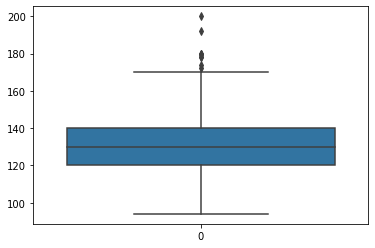

In [262]:
dataset = dataset.drop_duplicates()
sns.boxplot(dataset.trestbps)

In [263]:
#no missing values or duplicates, can move on to main analysis
#still need to remove outliers before any ML training and testing

#categorical fields: sex, cp, fbs, exang, thal, restecg
#rest are quantifiable
#get mean and mode of each variable
dataset.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [264]:
dataset.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
#average age is 54, tend to be male, no fbs, 1 vessel ca, chest pain type 1, chol 246, rest ecg at 0.52, 149 max heart rate, no exang

In [266]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<AxesSubplot: xlabel='trestbps', ylabel='Count'>

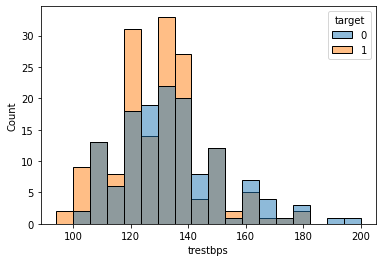

In [267]:
sns.histplot(data = dataset, x = 'trestbps', hue = 'target')

<AxesSubplot: xlabel='fbs', ylabel='count'>

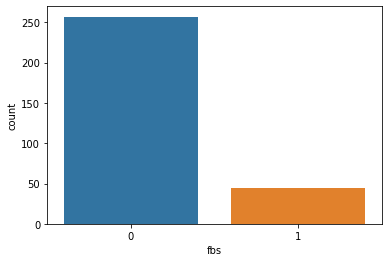

In [268]:
#it seems trestbps affects the occurence of heart attacks in the patient
sns.countplot(x = dataset.fbs)

<AxesSubplot: xlabel='ca', ylabel='count'>

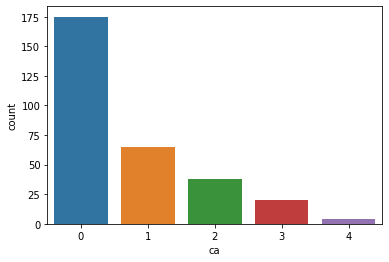

In [269]:
sns.countplot(x = dataset.ca)

<AxesSubplot: xlabel='cp', ylabel='count'>

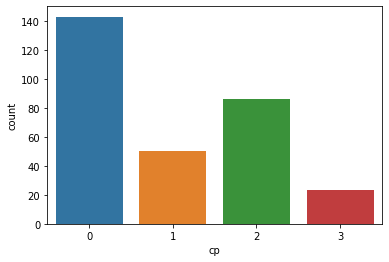

In [270]:
sns.countplot(x = dataset.cp)

<AxesSubplot: xlabel='exang', ylabel='count'>

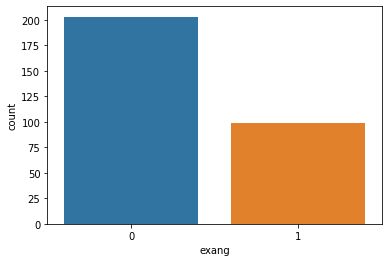

In [271]:
sns.countplot(x = dataset.exang)

In [272]:
maledata = dataset.drop(dataset[dataset['sex'] == 0].index)
maledata.shape

(206, 14)

In [273]:
femaledata = dataset.drop(dataset[dataset['sex'] == 1].index)
femaledata.shape

(96, 14)

In [274]:
maledata.mean()
#avg male patient

age          53.834951
sex           1.000000
cp            0.927184
trestbps    130.912621
chol        239.601942
fbs           0.160194
restecg       0.504854
thalach     148.844660
exang         0.373786
oldpeak       1.120874
slope         1.383495
ca            0.796117
thal          2.402913
target        0.446602
dtype: float64

In [275]:
femaledata.mean()
#avg female patient

age          55.677083
sex           0.000000
cp            1.041667
trestbps    133.083333
chol        261.302083
fbs           0.125000
restecg       0.572917
thalach     151.125000
exang         0.229167
oldpeak       0.876042
slope         1.427083
ca            0.552083
thal          2.125000
target        0.750000
dtype: float64

<AxesSubplot: xlabel='count', ylabel='age'>

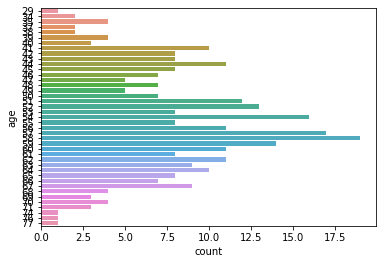

In [276]:
#seems heart attack risk may trend towards females
sns.countplot(data = dataset, y = 'age')

In [277]:
rcParams['figure.figsize'] = 11.7, 8.2

<AxesSubplot: xlabel='count', ylabel='age'>

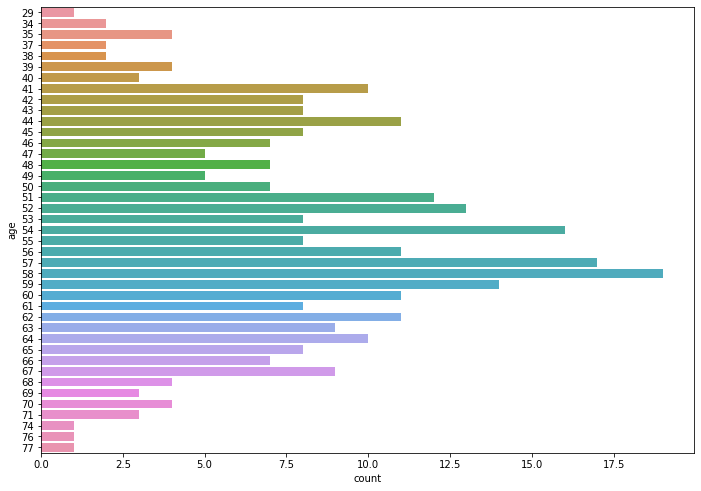

In [278]:
sns.countplot(data = dataset, y = 'age')

<AxesSubplot: xlabel='age', ylabel='exang'>

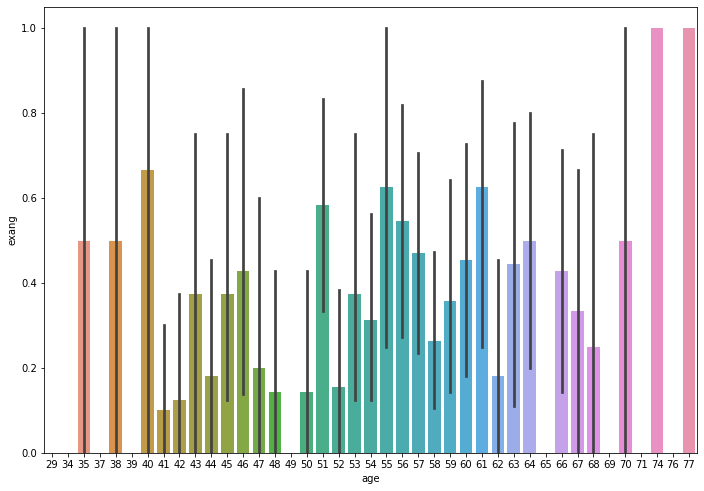

In [279]:
rcParams['figure.figsize'] = 11.7, 8.2
sns.barplot(data = dataset, x = 'age', y = 'exang')

<AxesSubplot: xlabel='age', ylabel='ca'>

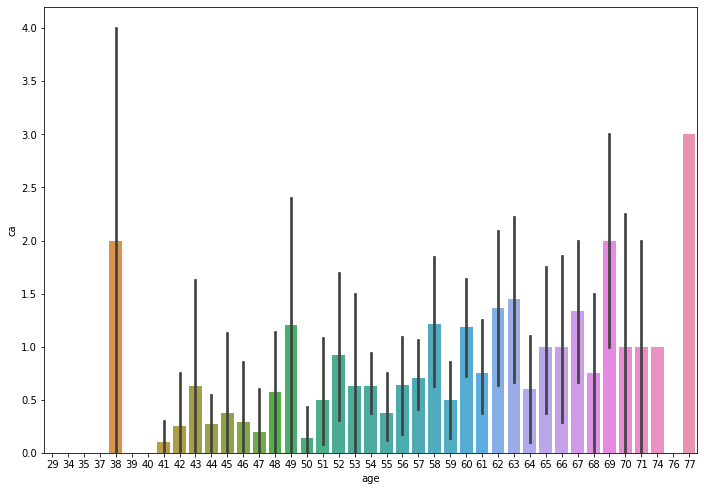

In [280]:
sns.barplot(data = dataset, x = 'age', y = 'ca')

<AxesSubplot: xlabel='cp', ylabel='ca'>

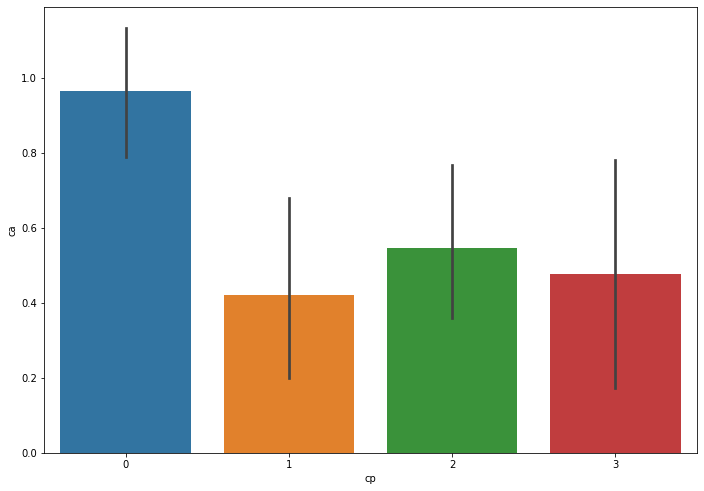

In [281]:
sns.barplot(data = dataset, y = 'ca', x = 'cp')

<AxesSubplot: xlabel='age', ylabel='exang'>

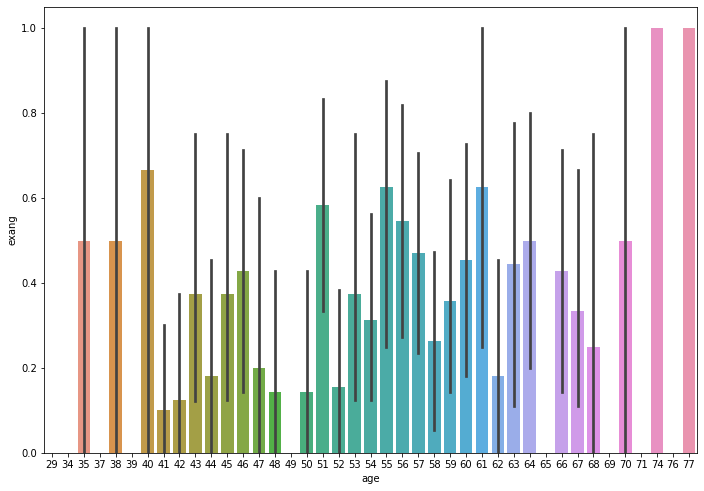

In [282]:
sns.barplot(data = dataset, x = 'age', y = 'exang')

<AxesSubplot: xlabel='age', ylabel='ca'>

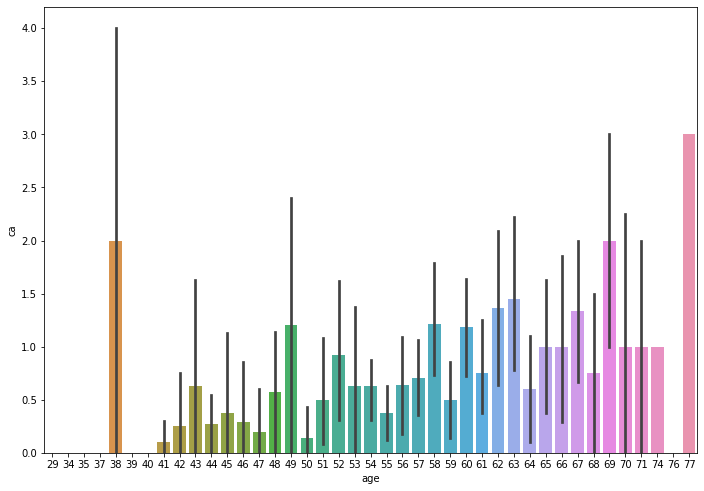

In [283]:
sns.barplot(data = dataset, x = 'age', y = 'ca')

<AxesSubplot: xlabel='age', ylabel='cp'>

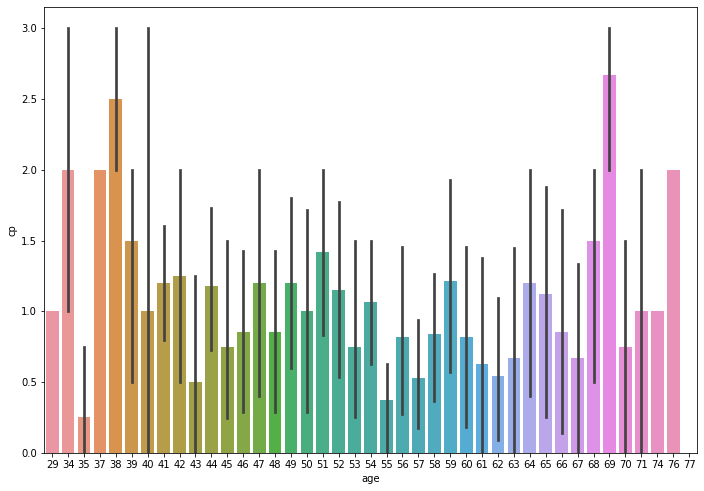

In [284]:
sns.barplot(data = dataset, x = 'age', y = 'cp')

<AxesSubplot: xlabel='age', ylabel='Count'>

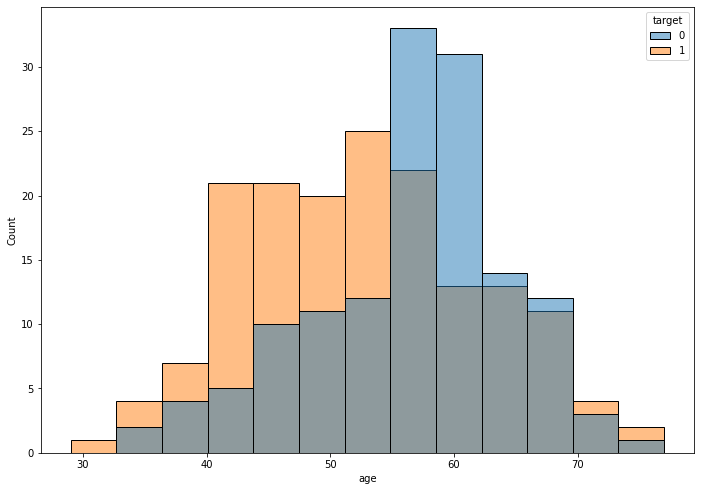

In [285]:
sns.histplot(data = dataset, x = 'age', hue = 'target')

<AxesSubplot: xlabel='chol', ylabel='Count'>

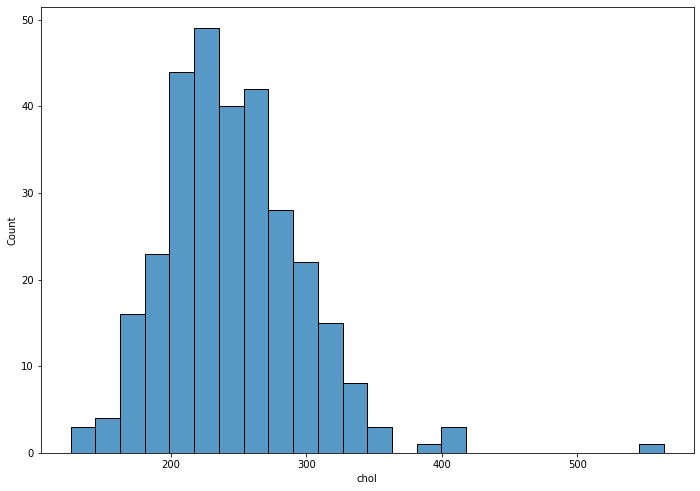

In [286]:
#it seems there's a spike in some related factors for the very young and very old, but that CVD overall increases with age
sns.histplot(data = dataset, x = 'chol')

<AxesSubplot: xlabel='chol', ylabel='Count'>

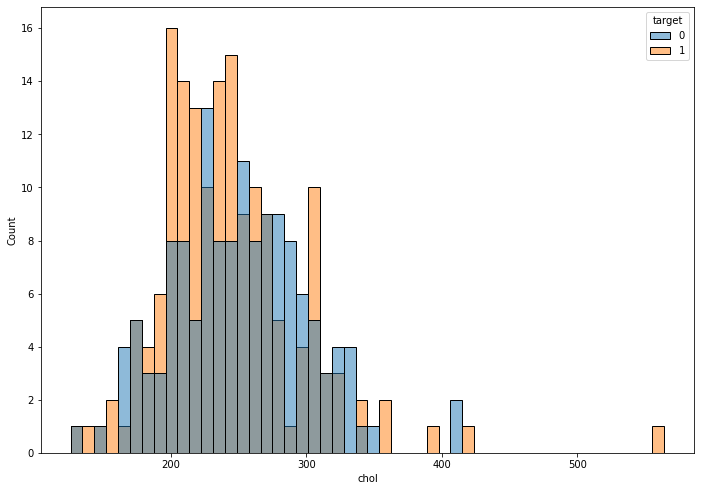

In [287]:
sns.histplot(data = dataset, x = 'chol', hue = 'target', bins = 50)
#cholestorol doesn't seem to have a relationship with target variable

<AxesSubplot: xlabel='thal', ylabel='count'>

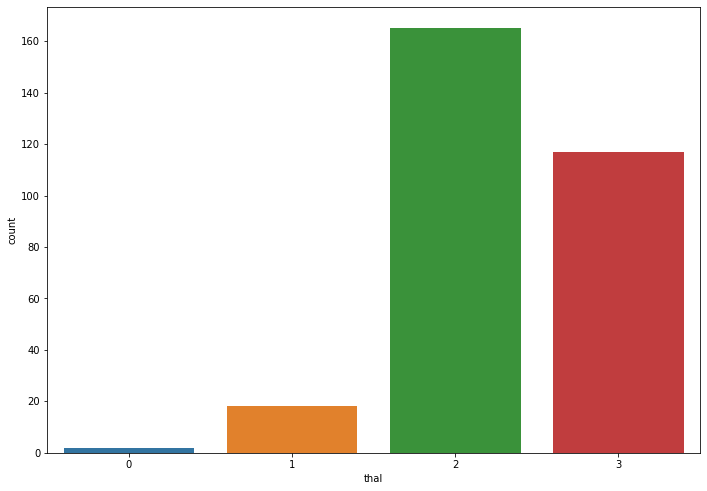

In [288]:
sns.countplot(data = dataset, x = 'thal')

<AxesSubplot: xlabel='thal', ylabel='ca'>

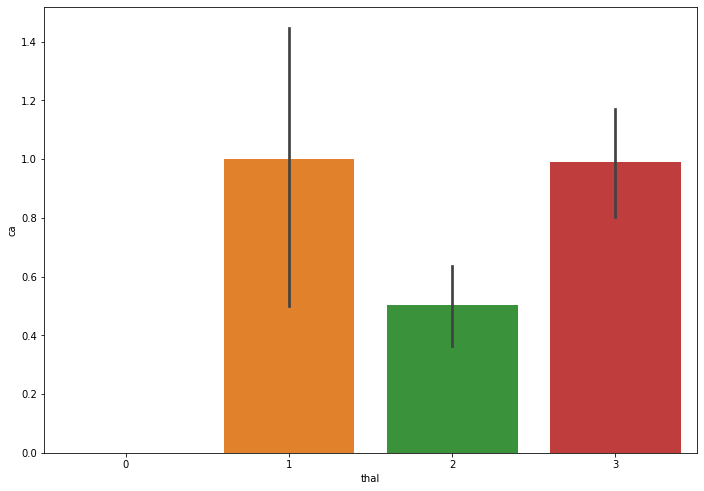

In [289]:
sns.barplot(data = dataset, x = 'thal', y = 'ca')

<AxesSubplot: xlabel='thal', ylabel='cp'>

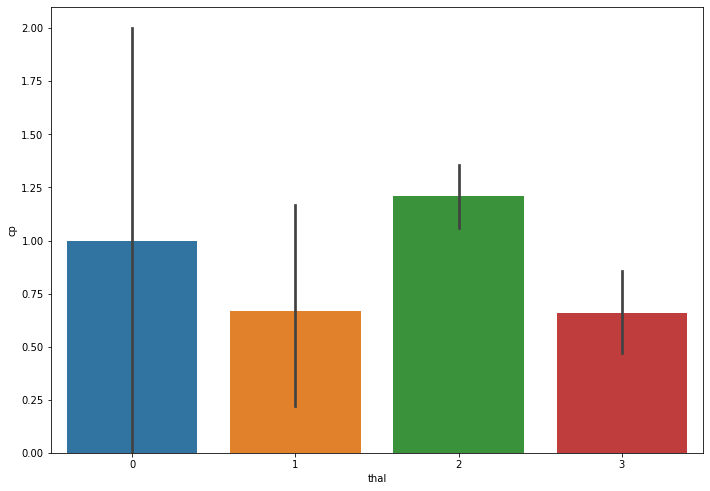

In [290]:
sns.barplot(data = dataset, x = 'thal', y = 'cp')
#reversible or fixed defect seems to have some correlation with CVD

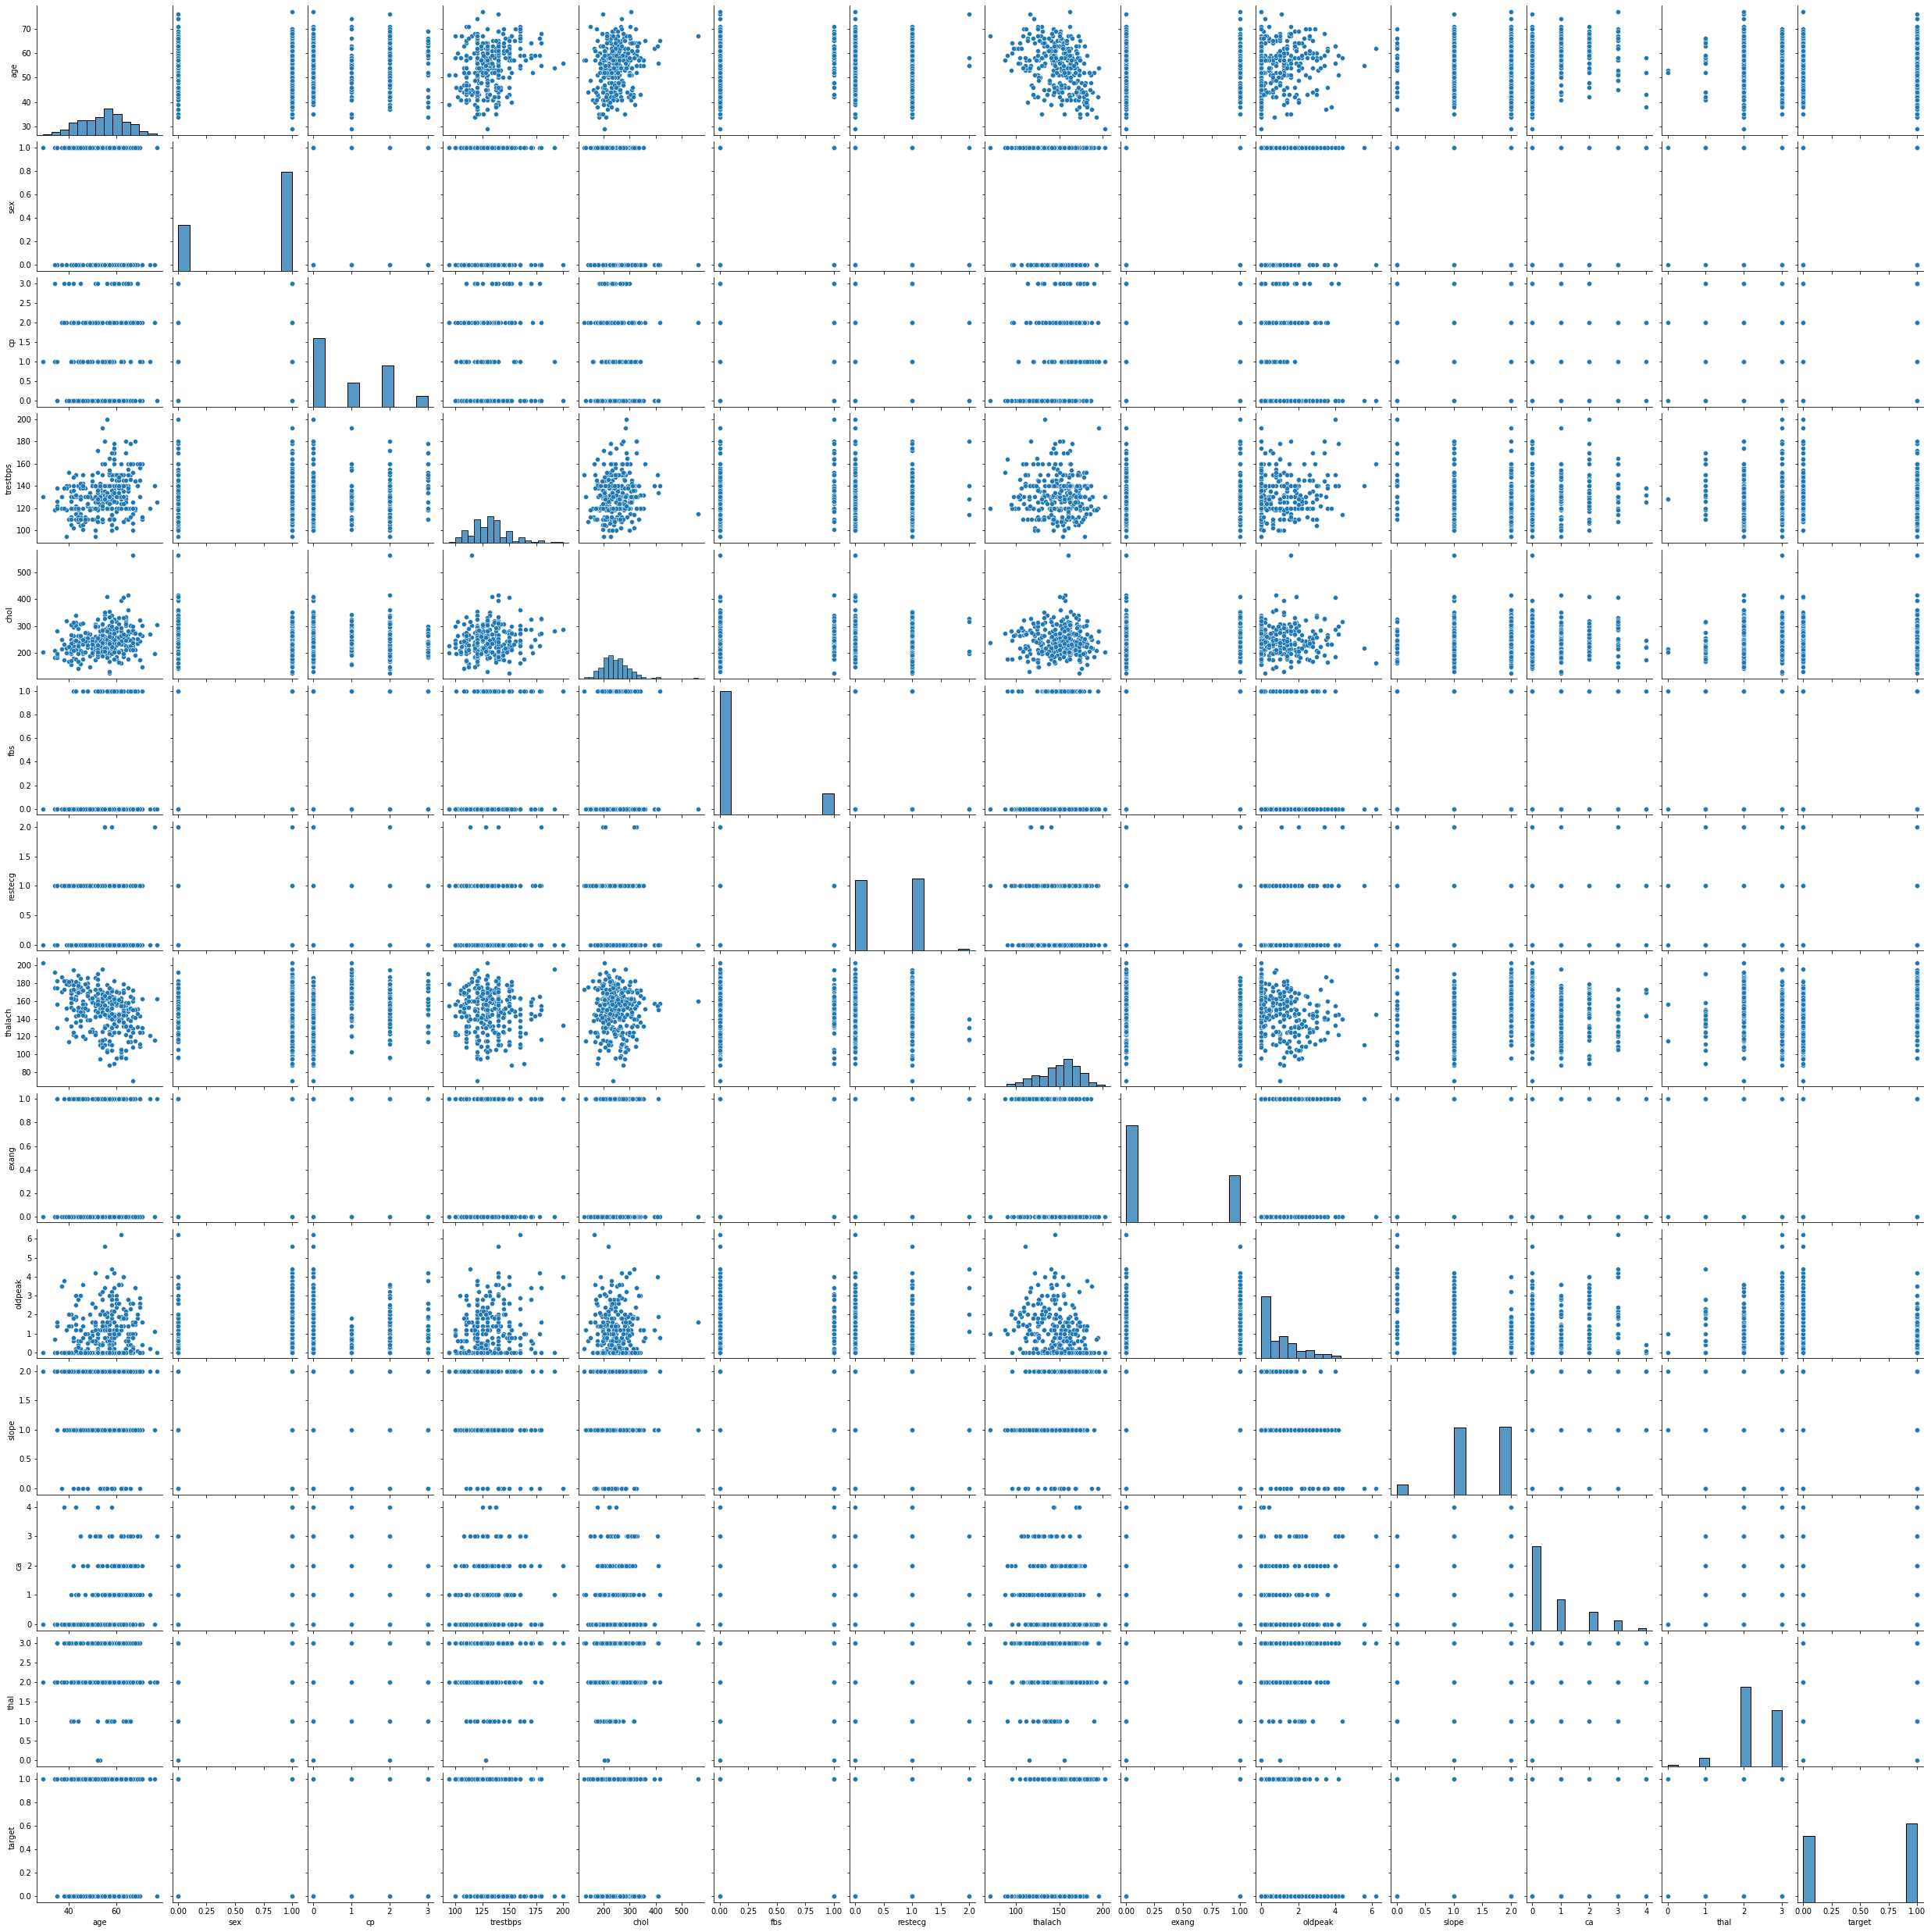

In [293]:
sns.pairplot(dataset)

In [294]:
#change categories into non-integers and make dummy vars for them
#categorical fields are sex, thal, exang, slope, restecg, fbs
#issues with changing values normally, used loc for this purpose
dataset.loc[dataset['sex'] == 0, 'sex'] = 'male'
dataset.loc[dataset['sex'] == 1, 'sex'] = 'female'

dataset.loc[dataset['cp'] == 0, 'cp'] = 'typical'
dataset.loc[dataset['cp'] == 1, 'cp'] = 'atypical'
dataset.loc[dataset['cp'] == 2, 'cp'] = 'non-anignal'
dataset.loc[dataset['cp'] == 3, 'cp'] = 'asymptomatic'

dataset.loc[dataset['exang'] == 0, 'exang'] = 'no angina'
dataset.loc[dataset['exang'] == 1, 'exang'] = 'angina'

dataset.loc[dataset['fbs'] == 0, 'fbs'] = 'no fbs'
dataset.loc[dataset['fbs'] == 1, 'fbs'] = 'fbs'

dataset.loc[dataset['restecg'] == 0, 'restecg'] = 'normal'
dataset.loc[dataset['restecg'] == 1, 'restecg'] = 'st-t abnormality'
dataset.loc[dataset['restecg'] == 2, 'restecg'] = 'left ventricular hypertrophy'

dataset.loc[dataset['slope'] == 0, 'slope'] = 'up'
dataset.loc[dataset['slope'] == 1, 'slope'] = 'no slope'
dataset.loc[dataset['slope'] == 2, 'slope'] = 'down'
                 
dataset.loc[dataset['thal'] == 0, 'thal'] = 'nothing'
dataset.loc[dataset['thal'] == 1, 'thal'] = 'normal'
dataset.loc[dataset['thal'] == 2, 'thal'] = 'fixed'
dataset.loc[dataset['thal'] == 3, 'thal'] = 'reversible'

/tmp/ipykernel_190/1709675921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset['sex'] == 0, 'sex'] = 'male'
/tmp/ipykernel_190/1709675921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset['cp'] == 0, 'cp'] = 'typical'
/tmp/ipykernel_190/1709675921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [295]:
dataset['sex'] = dataset['sex'].astype('object') 
dataset['cp'] = dataset['cp'].astype('object')  
dataset['fbs'] = dataset['fbs'].astype('object')
dataset['restecg'] = dataset['restecg'].astype('object')  
dataset['exang'] = dataset['exang'].astype('object')  
dataset['slope'] = dataset['slope'].astype('object') 
dataset['thal'] = dataset['thal'].astype('object')
dataset.dtypes

/tmp/ipykernel_190/3689265087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sex'] = dataset['sex'].astype('object')
/tmp/ipykernel_190/3689265087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cp'] = dataset['cp'].astype('object')
/tmp/ipykernel_190/3689265087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [296]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,asymptomatic,145,233,fbs,normal,150,no angina,2.3,up,0,normal,1
1,37,female,non-anignal,130,250,no fbs,st-t abnormality,187,no angina,3.5,up,0,fixed,1
2,41,male,atypical,130,204,no fbs,normal,172,no angina,1.4,down,0,fixed,1
3,56,female,atypical,120,236,no fbs,st-t abnormality,178,no angina,0.8,down,0,fixed,1
4,57,male,typical,120,354,no fbs,st-t abnormality,163,angina,0.6,down,0,fixed,1


In [297]:
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical,cp_non-anignal,cp_typical,fbs_no fbs,restecg_normal,restecg_st-t abnormality,exang_no angina,slope_no slope,slope_up,thal_normal,thal_nothing,thal_reversible
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0
2,41,130,204,172,1.4,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0


In [298]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_male', 'cp_atypical', 'cp_non-anignal', 'cp_typical', 'fbs_no fbs',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_no angina',
       'slope_no slope', 'slope_up', 'thal_normal', 'thal_nothing',
       'thal_reversible'],
      dtype='object')

In [299]:
dataset.shape

(302, 20)

In [300]:
#train for logistic regression and random forest
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset.drop('target', 1), dataset['target'], train_size = 0.7, random_state = 10)

/tmp/ipykernel_190/3202091934.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest = train_test_split(dataset.drop('target', 1), dataset['target'], train_size = 0.7, random_state = 10)


In [301]:
import statsmodels.api as sm
m1 = sm.OLS(ytrain, xtrain.astype(float))
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              43.18
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                    7.27e-59
Time:                        15:06:01   Log-Likelihood:                         -63.559
No. Observations:                 211   AIC:                                      165.1
Df Residuals:                     192   BIC:                                      228.8
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0036      0.003      1.253      0.212      -0.002       0.009
trestbps                    -0.0005      0.001     -0.397      0.692      -0.003       0.002
chol                        -0.0004      0.000     -0.804      0.423      -0.001       0.001
thalach                      0.0034      0.001      3.113      0.002       0.001       0.006
oldpeak                     -0.0537      0.027     -1.970      0.050      -0.107    7.74e-05
ca                          -0.1209      0.028     -4.327      0.000      -0.176      -0.066
sex_male                     0.1393      0.058      2.388      0.018       0.024       0.254
cp_atypical                  0.0439      0.103      0.425      0.671      -0.160       0.248
cp_non-anignal               0.0615      0.096      0.639      0.523      -0.128       0.251
cp_typical                  -0.1362      0.094     -1.447      0.149      -0.322       0.049
fbs_no fbs                   0.0173      0.068      0.252      0.801      -0.118       0.152
restecg_normal               0.1772      0.179      0.988      0.324      -0.177       0.531
restecg_st-t abnormality     0.1744      0.179      0.977      0.330      -0.178       0.527
exang_no angina              0.1540      0.061      2.536      0.012       0.034       0.274
slope_no slope              -0.1212      0.057     -2.117      0.036      -0.234      -0.008
slope_up                    -0.0432      0.108     -0.398      0.691      -0.257       0.171
thal_normal                 -0.1212      0.107     -1.133      0.259      -0.332       0.090
thal_nothing                -0.2058      0.248     -0.829      0.408      -0.695       0.284
thal_reversible             -0.1675      0.063     -2.677      0.008      -0.291      -0.044
==============================================================================
Omnibus:                        5.800   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                6.112
Skew:                          -0.270   Prob(JB):                       0.0471
Kurtosis:                       3.636   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
m1.pvalues

age                         0.211811
trestbps                    0.691634
chol                        0.422636
thalach                     0.002134
oldpeak                     0.050327
ca                          0.000024
sex_male                    0.017899
cp_atypical                 0.671477
cp_non-anignal              0.523400
cp_typical                  0.149485
fbs_no fbs                  0.801110
restecg_normal              0.324438
restecg_st-t abnormality    0.329749
exang_no angina             0.012006
slope_no slope              0.035573
slope_up                    0.691050
thal_normal                 0.258673
thal_nothing                0.407992
thal_reversible             0.008066
dtype: float64

In [303]:
import sklearn.metrics as metrics
ytepre = m1.predict(xtest)
print(np.sqrt(metrics.mean_squared_error(ytest, ytepre)))
#0.3758659916371326 RMSE

0.3758659916371326


In [304]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=500)

In [305]:
pred = rfc.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74        46
           1       0.71      0.89      0.79        45

    accuracy                           0.77        91
   macro avg       0.79      0.77      0.77        91
weighted avg       0.79      0.77      0.77        91



In [306]:
print(confusion_matrix(ytest, pred))

[[30 16]
 [ 5 40]]


In [307]:
#according to logreg model, factors that are most important should be thalach, ca, exang no angina, thal reversible and slope no slope
#this means that no exercise induced angina, reversible defects, flat/no slope, having less vessels with fluoroscopy.
#these are factors that I thought would usually be correlated with decrease in heart attack risk, so these results are surprising